# Final Exam and Presentation

In [ ]:
import pandas as pd
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Basic Data Exploration

ich nutzt describe() um den Datensatz besser kennen zu lernen. So lann ich sehen wo leere Werte sind 

In [24]:
df = pd.read_csv("stroke-data-preprocessed.csv")

df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,0.414286,43.226614,0.097456,0.054012,0.656164,2.167710,0.508023,106.147677,28.862035,1.376908,0.048728
std,0.493044,22.612647,0.296607,0.226063,0.475034,1.090293,0.499985,45.283560,7.699562,1.071534,0.215320
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,0.000000,77.245000,23.800000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,2.000000,1.000000,91.885000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,3.000000,1.000000,114.090000,32.800000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,97.600000,3.000000,1.000000


The results show 7 numbers for each column in your original dataset. The first number, the count, shows how many rows have non-missing values
Result BMI hat fehlende Werte also ist der nächste Schritt die bereinigung des Datensatzes. Die Zeile ID ist überflüssig und kann entfernt werden. Die fehlenden Werte beim BMI ersetzte ich mit dem Median

In [26]:
print("Initial Dataset Shape:", df.shape)

Initial Dataset Shape: (5110, 11)


In [ ]:
# alle Zeilen selektieren vom Typ number also nur die numerischen Werte

numeric_cols = df.select_dtypes(include=['number']).columns
#die detection
Q1 = df[numeric_cols].quantile(0.25) # 25% Quantil
Q3 = df[numeric_cols].quantile(0.75) # 75% Quantil
IQR = Q3 - Q1 # Interquartilbereich

#defineren der Außreißer -> Werte die außerhalb des Interquartilbereichs liegen

lower_bound = Q1 - 1.5 * IQR 
upper_bound = Q3 + 1.5 * IQR

#definerten Außenseiter mit NA ersetzen
outliers = ((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound))
df[numeric_cols] = df[numeric_cols].mask(outliers)

In [44]:
print("\nSummary Statistics (After Cleaning):\n")
print(df_clean.describe())


Summary Statistics (After Cleaning):

            gender          age  hypertension  heart_disease  ever_married  \
count  3248.000000  3248.000000        3248.0         3248.0   3248.000000   
mean      0.404249    36.106663           0.0            0.0      0.552956   
std       0.491449    21.984090           0.0            0.0      0.497264   
min       0.000000     0.080000           0.0            0.0      0.000000   
25%       0.000000    18.000000           0.0            0.0      0.000000   
50%       0.000000    35.000000           0.0            0.0      1.000000   
75%       1.000000    53.000000           0.0            0.0      1.000000   
max       2.000000    82.000000           0.0            0.0      1.000000   

         work_type  Residence_type  avg_glucose_level          bmi  \
count  3248.000000     3248.000000        3248.000000  3248.000000   
mean      2.543411        0.507697          89.791001    27.103387   
std       0.814460        0.500018          20.2

In [46]:
# Definieren Merkmale und Zielvariable X ist dann zum "Füttern" des Modells und y ist das Ziel, das vorhergesagt werden soll
X = df.drop('stroke', axis=1)
y = df['stroke']

# Min und Max Skalierung
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Chi2 test
chi2_scores, p_values = chi2(X_scaled, y)

# raning der Features erstellen, die auf den Chi2-Scores basieren
feature_ranking = pd.DataFrame({
    'Feature': X.columns,
    'Chi2_Score': chi2_scores,
    'P_Value': p_values
}).sort_values(by='Chi2_Score', ascending=False)

print("\nChi-squared Feature Ranking:\n", feature_ranking)

ValueError: Input contains NaN.

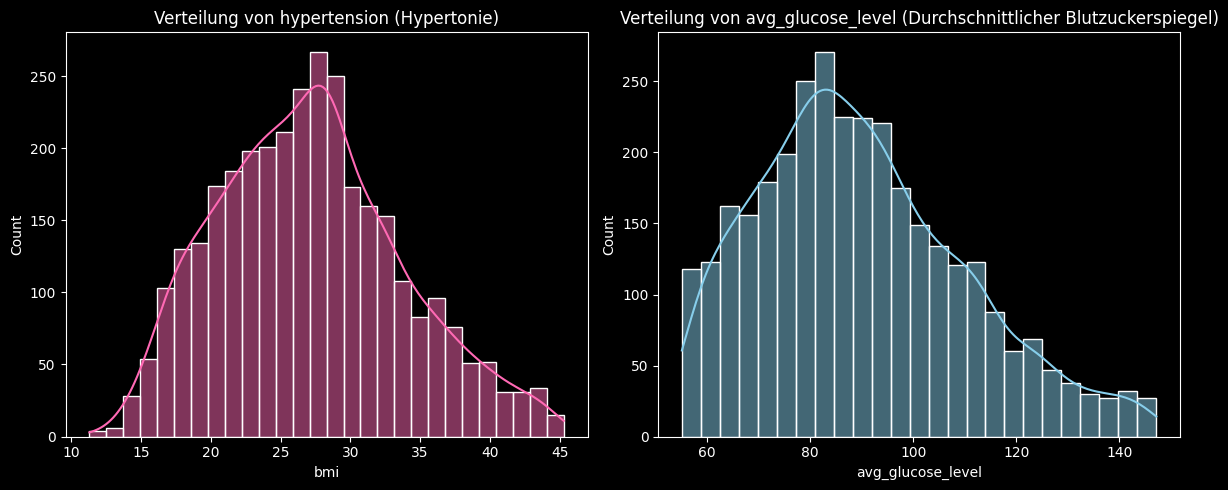

In [35]:
plt.figure(figsize=(12, 5))

# Histogramm für plas
plt.subplot(1, 2, 1)
sns.histplot(df_clean['bmi'], kde=True, color='hotpink')
plt.title('Verteilung von hypertension (Hypertonie)')

# Histogramm für skin
plt.subplot(1, 2, 2)
sns.histplot(df_clean['avg_glucose_level'], kde=True, color='skyblue')
plt.title('Verteilung von avg_glucose_level (Durchschnittlicher Blutzuckerspiegel)')

plt.tight_layout()
plt.show()

/var/folders/h4/rxs_f2t56ng4372r52py0g0h0000gn/T/ipykernel_48983/4703123.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=best_feature, data=df_clean, palette=['pink', 'lightblue'])
/var/folders/h4/rxs_f2t56ng4372r52py0g0h0000gn/T/ipykernel_48983/4703123.py:11: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.boxplot(x='stroke', y=best_feature, data=df_clean, palette=['pink', 'lightblue'])
/var/folders/h4/rxs_f2t56ng4372r52py0g0h0000gn/T/ipykernel_48983/4703123.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=worst_feature, data=df_clean, palette=['pink', 'lightblue'])
/var/folders/h4/rxs_f2t56ng4372r52p

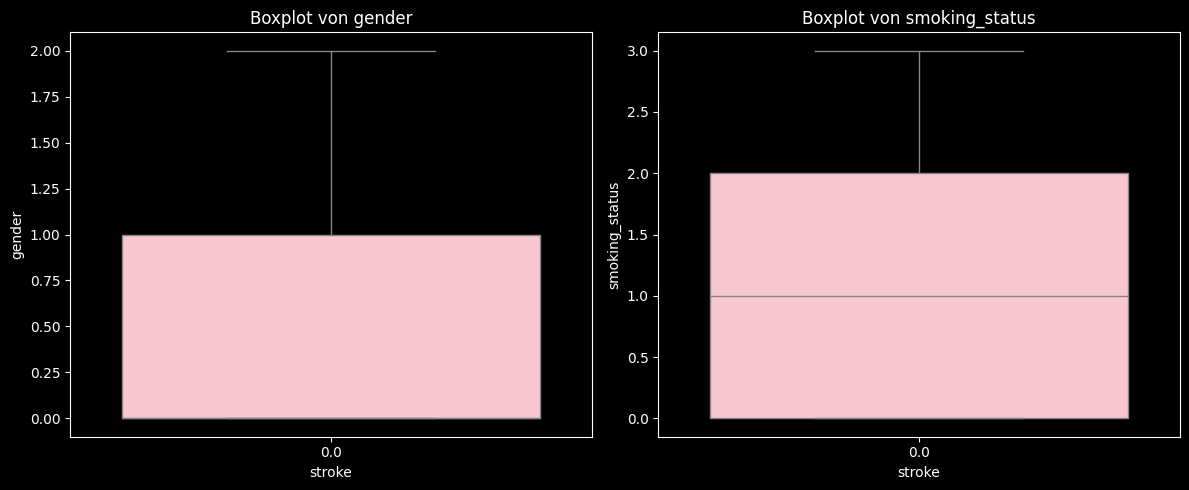

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# beste und schlechteste Merkmale
best_feature = feature_ranking.iloc[0]['Feature']
worst_feature = feature_ranking.iloc[-1]['Feature']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='stroke', y=best_feature, data=df_clean, palette=['pink', 'lightblue'])
plt.title(f'Boxplot von {best_feature}')

plt.subplot(1, 2, 2)
sns.boxplot(x='stroke', y=worst_feature, data=df_clean, palette=['pink', 'lightblue'])
plt.title(f'Boxplot von {worst_feature}')

plt.tight_layout()
plt.show()


In [41]:
print(df['stroke'].value_counts())

stroke
0.0    4861
Name: count, dtype: int64


Zielvariable definieren

In [5]:
y = df["stroke"]

# === 5. Nur diskrete (kategoriale) Merkmale auswählen ===
# Diese Variablen sind (laut Datenstruktur) kategorisch:
cat_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# === 6. Kategorische Merkmale in numerische Codes umwandeln ===
X_cat = df[cat_features].copy()

for col in X_cat.columns:
    X_cat[col] = X_cat[col].astype('category').cat.codes

Ch2 Test


Chi-squared Feature Ranking:

          Feature  Chi2_Score       P_Value
2   heart_disease   87.987436  6.587154e-21
1    hypertension   75.449498  3.748736e-18
3    ever_married   20.622787  5.592648e-06
6  smoking_status    3.369423  6.641702e-02
4       work_type    2.925901  8.716857e-02
5  Residence_type    0.600717  4.383046e-01
0          gender    0.239001  6.249287e-01


/var/folders/h4/rxs_f2t56ng4372r52py0g0h0000gn/T/ipykernel_48983/3190774975.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_ranking, x="Chi2_Score", y="Feature", palette="viridis")


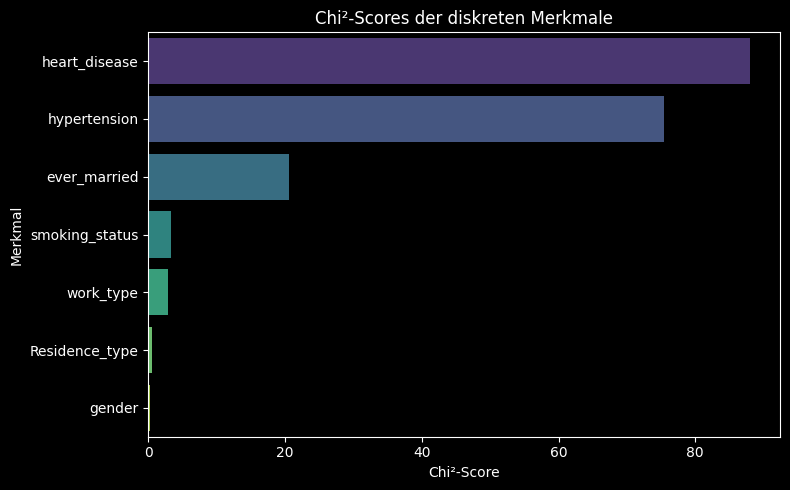

In [ ]:
chi2_scores, p_values = chi2(X_cat, y)


feature_ranking = pd.DataFrame({
    'Feature': X_cat.columns,
    'Chi2_Score': chi2_scores,
    'P_Value': p_values
}).sort_values(by='Chi2_Score', ascending=False)

print("\nChi-squared Feature Ranking:\n")
print(feature_ranking)


plt.figure(figsize=(8, 5))
sns.barplot(data=feature_ranking, x="Chi2_Score", y="Feature", palette="viridis")
plt.title("Chi²-Scores der diskreten Merkmale")
plt.xlabel("Chi²-Score")
plt.ylabel("Merkmal")
plt.tight_layout()
plt.show()

heart_disease, hypertension, und ever_married sind statistisch signifikant mit stroke assoziiert.

Die restlichen Variablen (z. B. gender, Residence_type, smoking_status) zeigen keinen signifikanten Zusammenhang dem Datensatz.

In [ ]:
df_model = df_cleaned.copy()

# Zielvariable trennen
y = df_model['stroke']

# Kategorische Variablen erkennen
categorical_cols = df_model.select_dtypes(include='object').columns

# One-Hot-Encoding anwenden
df_model_encoded = pd.get_dummies(df_model.drop(columns='stroke'), drop_first=True)

# Trainings-/Testdaten vorbereiten
X_train, X_test, y_train, y_test = train_test_split(df_model_encoded, y, test_size=0.2, random_state=42, stratify=y)

# Modell trainieren
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Vorhersage & Bewertung
y_pred = model.predict(X_test)
print("Genauigkeit:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Koeffizienten anzeigen
coeff_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

print(coeff_df)

Genauigkeit: 0.9695193434935522
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       826
           1       1.00      0.04      0.07        27

    accuracy                           0.97       853
   macro avg       0.98      0.52      0.53       853
weighted avg       0.97      0.97      0.96       853

                           Feature  Coefficient
12              work_type_children    -1.708892
11         work_type_Self-employed    -0.621163
3                    heart_disease     0.592637
2                     hypertension     0.516379
10               work_type_Private    -0.408372
8                 ever_married_Yes    -0.400737
14  smoking_status_formerly smoked     0.238606
13            Residence_type_Urban    -0.147336
16           smoking_status_smokes     0.140595
15     smoking_status_never smoked    -0.138513
9           work_type_Never_worked    -0.120902
1                              age     0.063381
5                

/Users/mariehoppe/Library/Mobile Documents/com~apple~CloudDocs/UMIT/SoSe2025/Modul 12 Application of Machine Learning in Health Care/VS/Python/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

ValueError: could not convert string to float: 'Male'